<a href="https://colab.research.google.com/github/Spamziesagcan/Time-Series-Analysis/blob/main/Arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/NYPD_Arrest_Data__Year_to_Date_.csv'
df = pd.read_csv(file_path)

Display top rows of the dataset.

In [ ]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01/03/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01/03/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01/04/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01/07/2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


Displaying bottom rows of the dataset.

In [ ]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
128773,288539851,06/14/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,S,120,0,25-44,M,WHITE HISPANIC,961273,166477,40.623588,-74.082771,POINT (-74.08277059164357 40.62358756462782)
128774,288770364,06/19/2024,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F,S,122,0,45-64,M,WHITE HISPANIC,960514,151754,40.583176,-74.085450,POINT (-74.08545 40.583176)
128775,288845960,06/20/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,9,2,45-64,M,BLACK HISPANIC,990284,201838,40.720673,-73.978232,POINT (-73.97823191814932 40.72067330872773)
128776,288345759,06/11/2024,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F,Q,103,0,25-44,M,ASIAN / PACIFIC ISLANDER,1038891,192114,40.693817,-73.802958,POINT (-73.80295796488015 40.69381660456438)
128777,288578223,06/15/2024,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,47,2,18-24,M,BLACK,1024133,262519,40.887139,-73.855758,POINT (-73.855758 40.887139)


Data Preprocessing.

In [ ]:
df.shape

(128778, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128778 entries, 0 to 128777
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                128778 non-null  int64  
 1   ARREST_DATE               128778 non-null  object 
 2   PD_CD                     128774 non-null  float64
 3   PD_DESC                   128778 non-null  object 
 4   KY_CD                     128763 non-null  float64
 5   OFNS_DESC                 128778 non-null  object 
 6   LAW_CODE                  128778 non-null  object 
 7   LAW_CAT_CD                128008 non-null  object 
 8   ARREST_BORO               128778 non-null  object 
 9   ARREST_PRECINCT           128778 non-null  int64  
 10  JURISDICTION_CODE         128778 non-null  int64  
 11  AGE_GROUP                 128778 non-null  object 
 12  PERP_SEX                  128778 non-null  object 
 13  PERP_RACE                 128778 non-null  o

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARREST_KEY,128778.0,2.846440e+08,2.762491e+06,2.797635e+08,2.822672e+08,2.846585e+08,2.870588e+08,2.893894e+08
PD_CD,128774.0,4.329508e+02,2.730616e+02,2.000000e+00,1.170000e+02,3.970000e+02,7.050000e+02,9.970000e+02
KY_CD,128763.0,2.530570e+02,1.474496e+02,1.010000e+02,1.130000e+02,3.400000e+02,3.440000e+02,9.950000e+02
ARREST_PRECINCT,128778.0,6.360030e+01,3.501022e+01,1.000000e+00,4.000000e+01,6.300000e+01,1.020000e+02,1.230000e+02
JURISDICTION_CODE,128778.0,9.365497e-01,7.066461e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e+01
X_COORD_CD,128778.0,1.005497e+06,2.171047e+04,0.000000e+00,9.905130e+05,1.005166e+06,1.017933e+06,1.067185e+06
Y_COORD_CD,128778.0,2.076262e+05,2.948981e+04,0.000000e+00,1.857100e+05,2.067800e+05,2.351708e+05,2.712820e+05
Latitude,128778.0,4.073589e+01,1.797762e-01,0.000000e+00,4.067636e+01,4.073420e+01,4.081213e+01,4.091124e+01
Longitude,128778.0,-7.392210e+01,3.013224e-01,-7.425271e+01,-7.397739e+01,-7.392447e+01,-7.387833e+01,0.000000e+00


In [ ]:
df.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,4
PD_DESC,0
KY_CD,15
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,770
ARREST_BORO,0
ARREST_PRECINCT,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
ARREST_KEY,0.000000
ARREST_DATE,0.000000
PD_CD,0.003106
PD_DESC,0.000000
KY_CD,0.011648
OFNS_DESC,0.000000
LAW_CODE,0.000000
LAW_CAT_CD,0.597928
ARREST_BORO,0.000000
ARREST_PRECINCT,0.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())

ARREST_KEY 128778
ARREST_DATE 182
PD_CD 253
PD_DESC 243
KY_CD 69
OFNS_DESC 66
LAW_CODE 945
LAW_CAT_CD 6
ARREST_BORO 5
ARREST_PRECINCT 77
JURISDICTION_CODE 25
AGE_GROUP 5
PERP_SEX 2
PERP_RACE 7
X_COORD_CD 23148
Y_COORD_CD 24378
Latitude 27217
Longitude 27202
New Georeferenced Column 27746


Removing outliers.

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Clear dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128778 entries, 0 to 128777
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                128778 non-null  int64  
 1   ARREST_DATE               128778 non-null  object 
 2   PD_CD                     128774 non-null  float64
 3   PD_DESC                   128778 non-null  object 
 4   KY_CD                     128763 non-null  float64
 5   OFNS_DESC                 128778 non-null  object 
 6   LAW_CODE                  128778 non-null  object 
 7   LAW_CAT_CD                128008 non-null  object 
 8   ARREST_BORO               128778 non-null  object 
 9   ARREST_PRECINCT           128778 non-null  int64  
 10  JURISDICTION_CODE         128778 non-null  int64  
 11  AGE_GROUP                 128778 non-null  object 
 12  PERP_SEX                  128778 non-null  object 
 13  PERP_RACE                 128778 non-null  o

Basis Statistical Analysis:

In [ ]:
summary_stats = df.describe()
summary_stats

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.287780e+05,128774.000000,128763.000000,128778.000000,128778.000000,1.287780e+05,128778.000000,128778.000000,128778.000000
mean,2.846440e+08,432.950782,253.056996,63.600304,0.936550,1.005497e+06,207626.160253,40.735888,-73.922101
std,2.762491e+06,273.061622,147.449578,35.010222,7.066461,2.171047e+04,29489.807544,0.179776,0.301322
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.822672e+08,117.000000,113.000000,40.000000,0.000000,9.905130e+05,185710.000000,40.676357,-73.977392
50%,2.846585e+08,397.000000,340.000000,63.000000,0.000000,1.005166e+06,206780.000000,40.734200,-73.924470
75%,2.870588e+08,705.000000,344.000000,102.000000,0.000000,1.017933e+06,235170.750000,40.812126,-73.878333
max,2.893894e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271282.000000,40.911236,0.000000


Data Visualization:

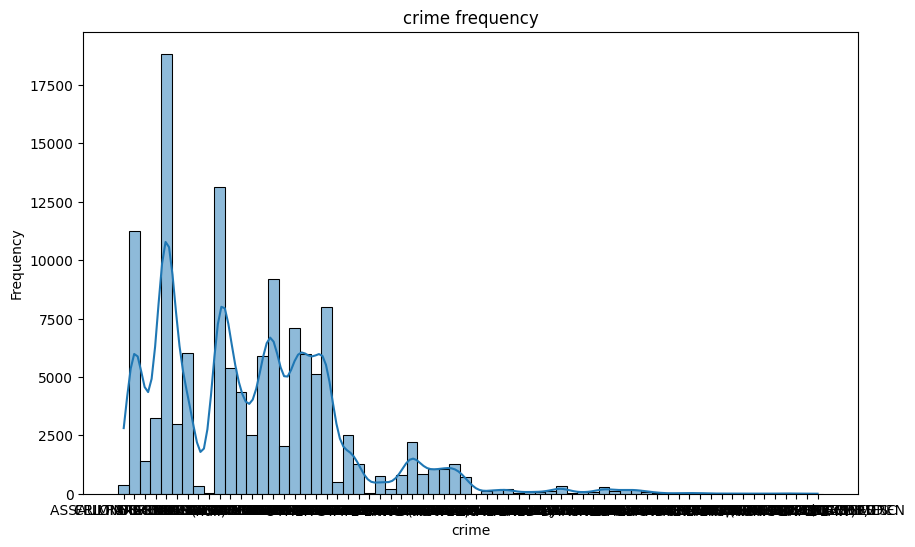

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OFNS_DESC'], kde=True, bins=30)
plt.title('crime frequency')
plt.xlabel('crime')
plt.ylabel('Frequency')
plt.show()

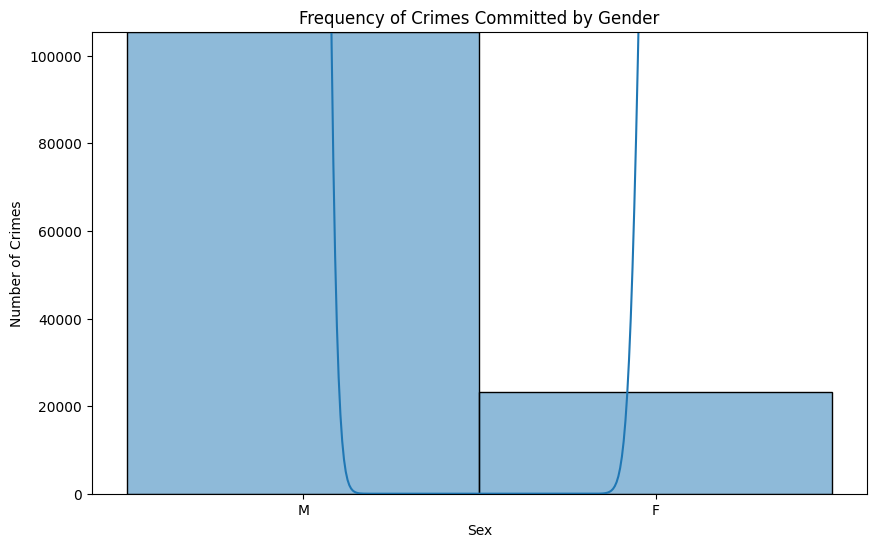

In [ ]:
crime_counts = df['PERP_SEX'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(df['PERP_SEX'], kde=True, bins=30)
plt.title('Frequency of Crimes Committed by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Crimes')
plt.ylim(0, crime_counts.max() + 5)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


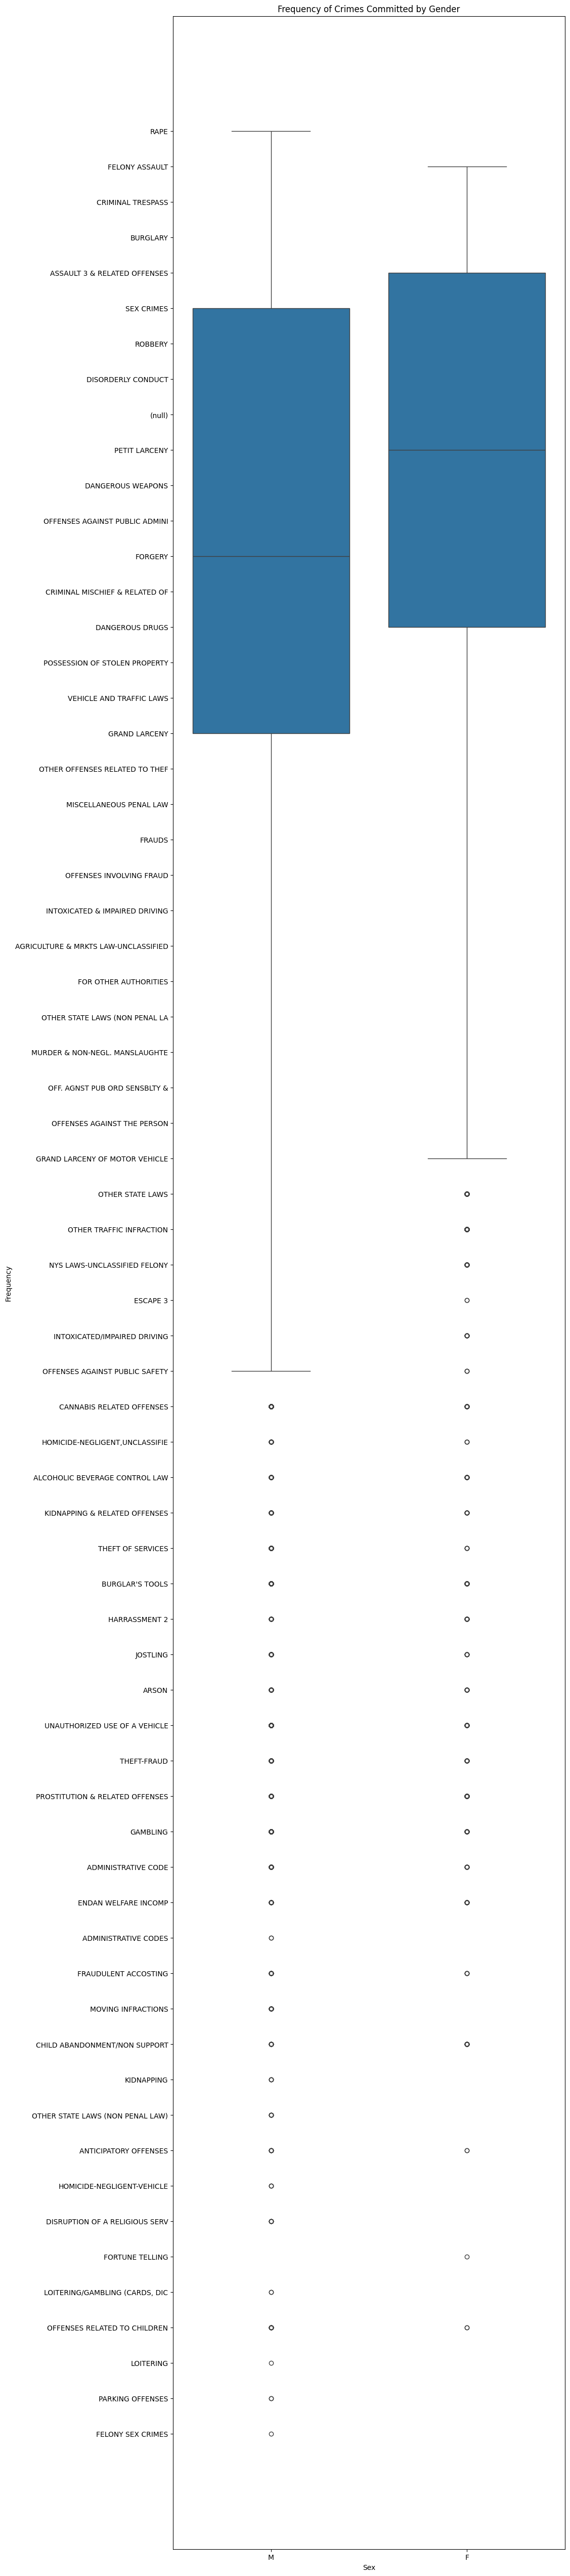

In [ ]:
crime_counts = df['PERP_SEX'].value_counts()

plt.figure(figsize=(10, 65))
sns.boxplot(x='PERP_SEX', y='OFNS_DESC', data=df)
plt.title('Frequency of Crimes Committed by Gender')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


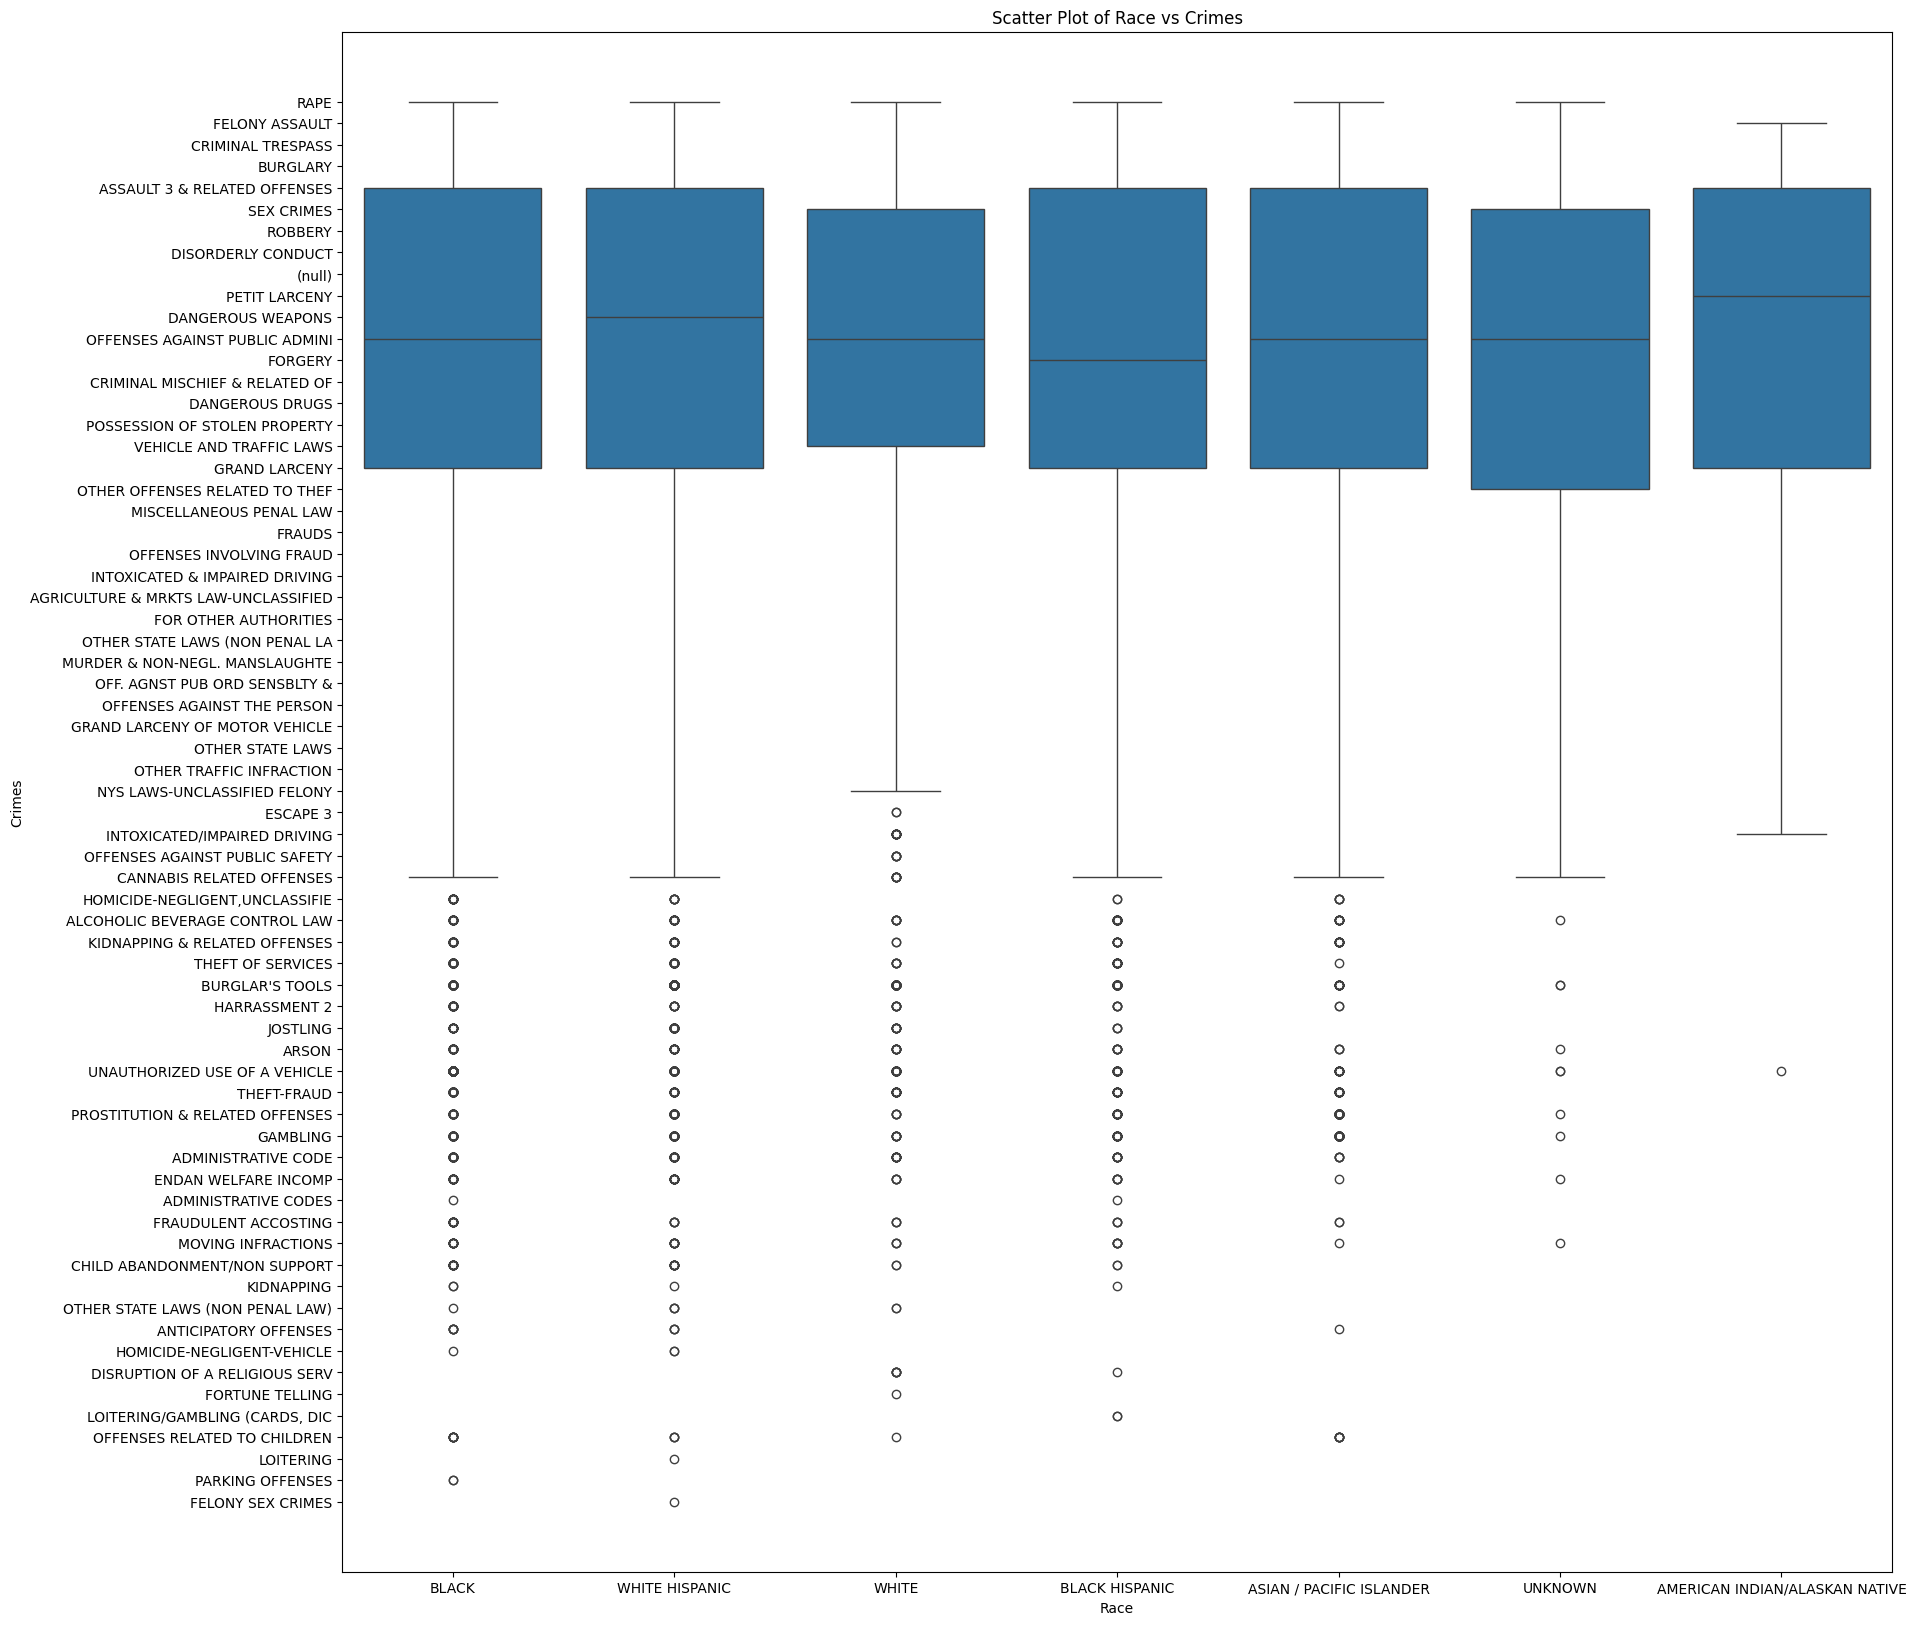

In [ ]:
crime_counts = df['PERP_RACE'].value_counts()

plt.figure(figsize=(20, 20))
sns.boxplot(x='PERP_RACE', y='OFNS_DESC', data=df)
plt.title('Scatter Plot of Race vs Crimes')
plt.xlabel('Race')
plt.ylabel('Crimes')
plt.show()

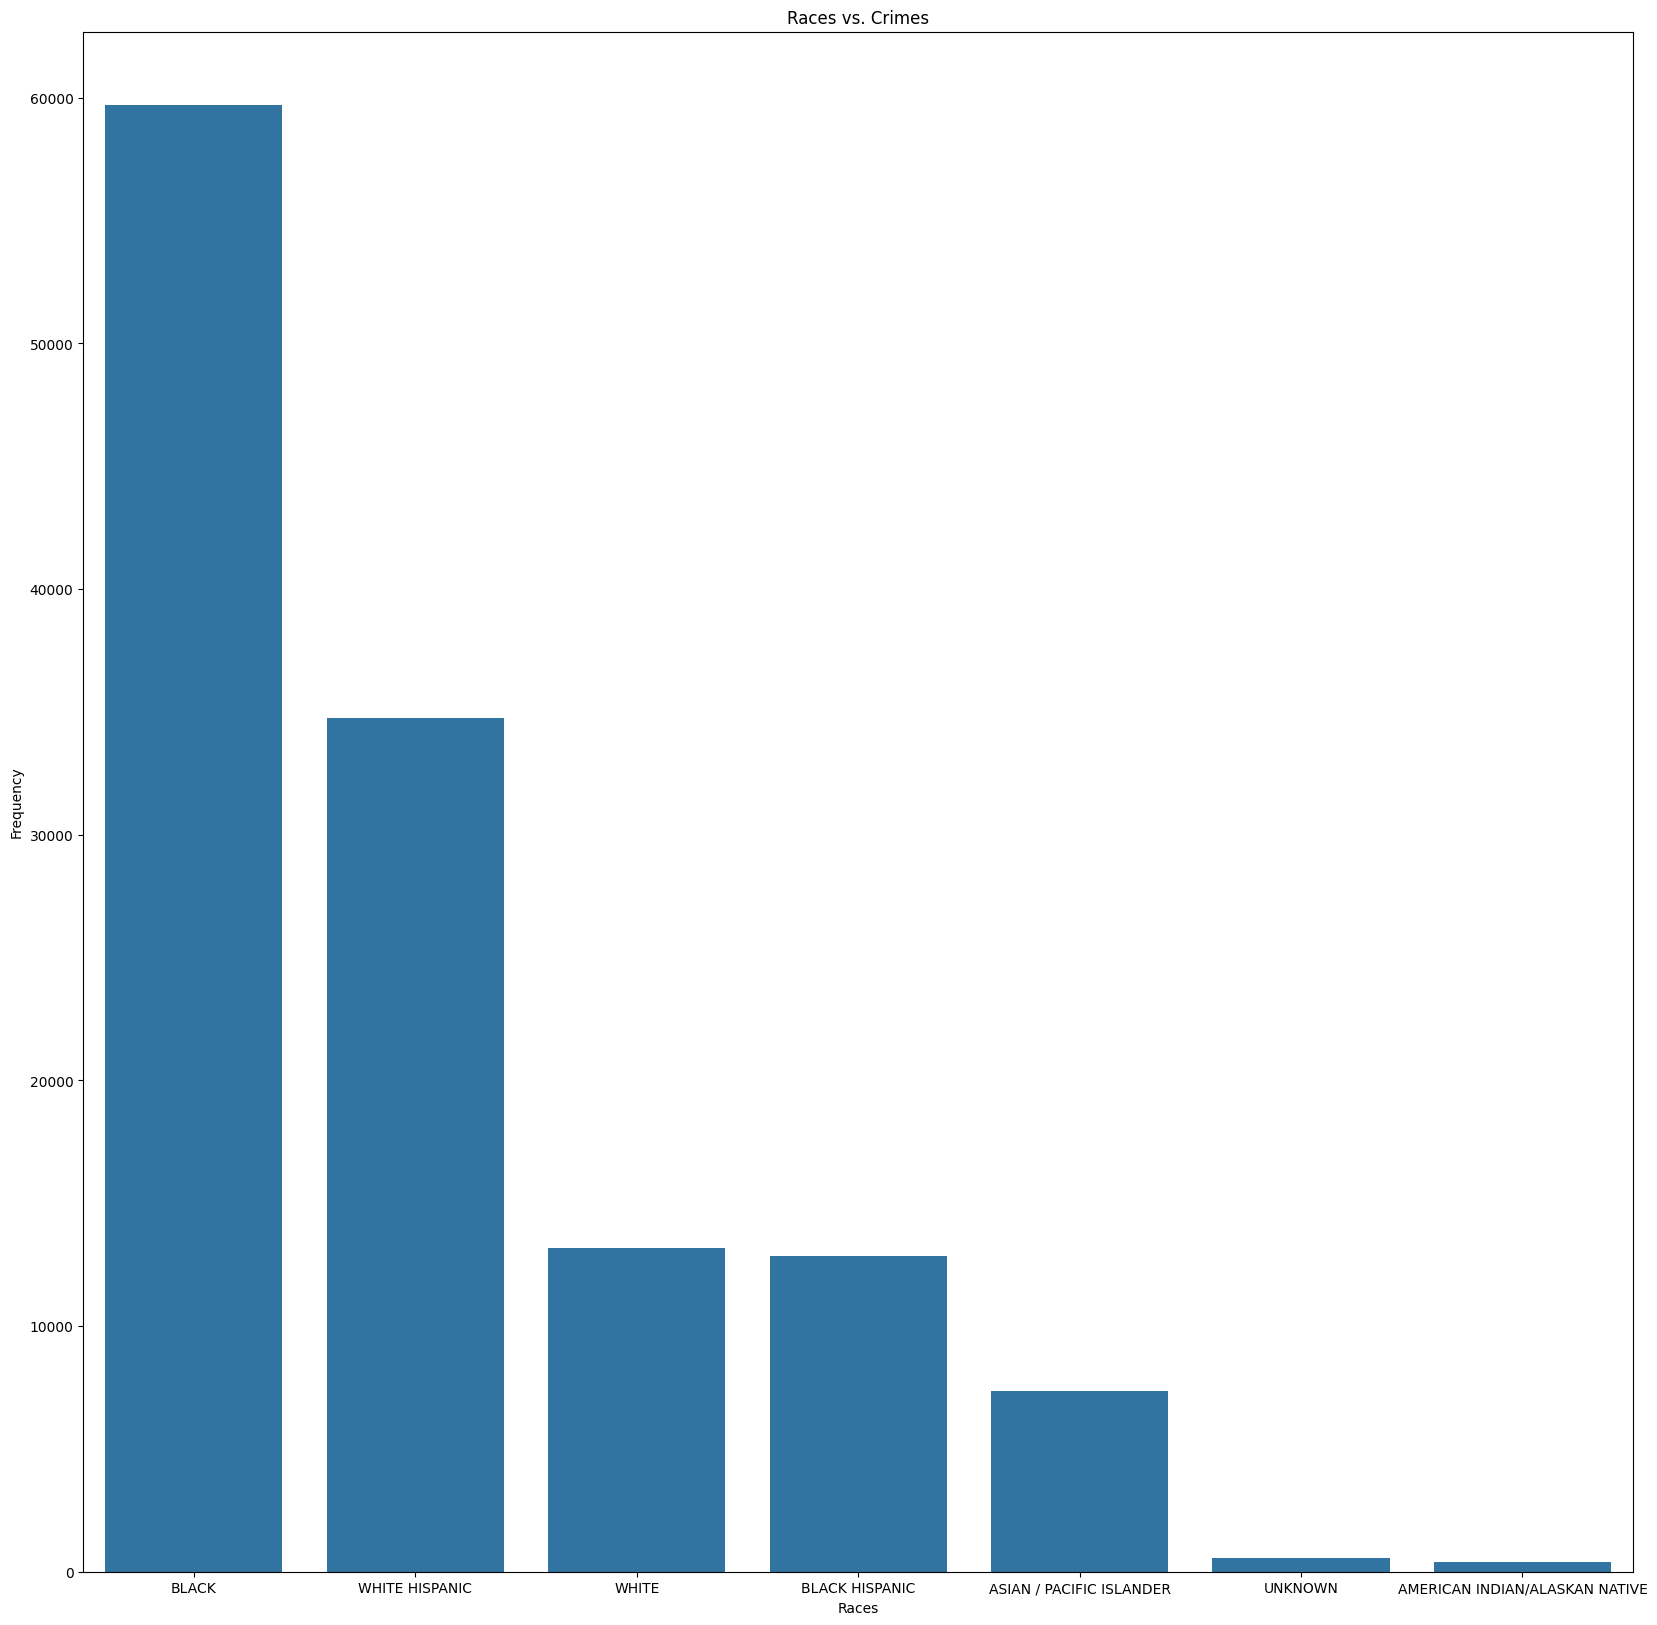

In [ ]:
plt.figure(figsize=(20, 20))
sns.countplot(x='PERP_RACE', data=df)
plt.title('Races vs. Crimes')
plt.xlabel('Races')
plt.ylabel('Frequency')
plt.show()

Autoregression Model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

df = df.sort_values(by='ARREST_DATE')

df.set_index('ARREST_DATE', inplace=True)

df.dropna(inplace=True)


Visualization.

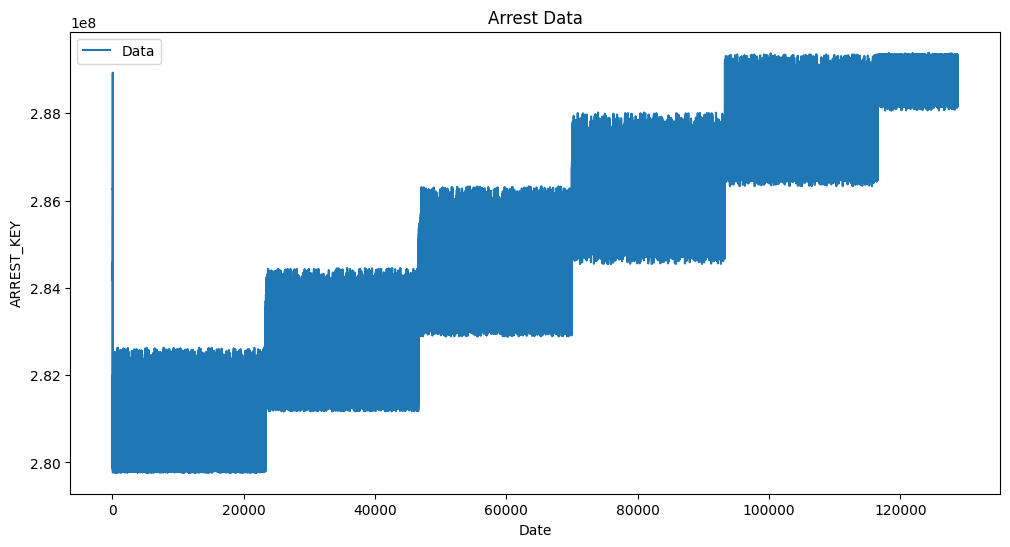

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot( df['ARREST_KEY'], label='Data')
plt.xlabel('Date')
plt.ylabel('ARREST_KEY')
plt.legend()
plt.title('Arrest Data')
plt.show()

In [ ]:
# Adding lag features to the DataFrame
for i in range(1, 6): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['ARREST_KEY'].shift(i)

# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['ARREST_KEY']

y_test = test_data['ARREST_KEY']


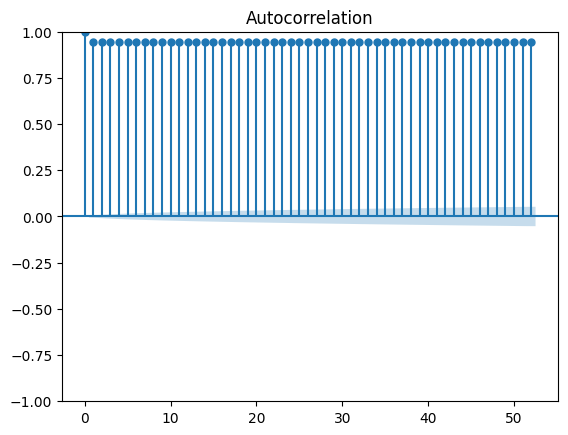

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df['ARREST_KEY_CODE'] = pd.Categorical(df['ARREST_KEY']).codes

series = df['ARREST_KEY_CODE']
plot_acf(series)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

lag_order = 1
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

102390    2.872247e+08
102391    2.869347e+08
102392    2.866690e+08
102393    2.864255e+08
102394    2.862024e+08
              ...     
127983    2.837568e+08
127984    2.837568e+08
127985    2.837568e+08
127986    2.837568e+08
127987    2.837568e+08
Length: 25598, dtype: float64
Mean Absolute Error: 4444565.86
Root Mean Squared Error: 4514338.22


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<ipython-input-11-0fe25f880755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ARREST_DATE'] = pd.to_datetime(train_data['ARREST_DATE'])
<ipython-input-11-0fe25f880755>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Date'] = pd.date_range(start=train_data['ARREST_DATE'].iloc[-1] + pd.Timedelta(days=1), periods=len(test_data), freq='D')


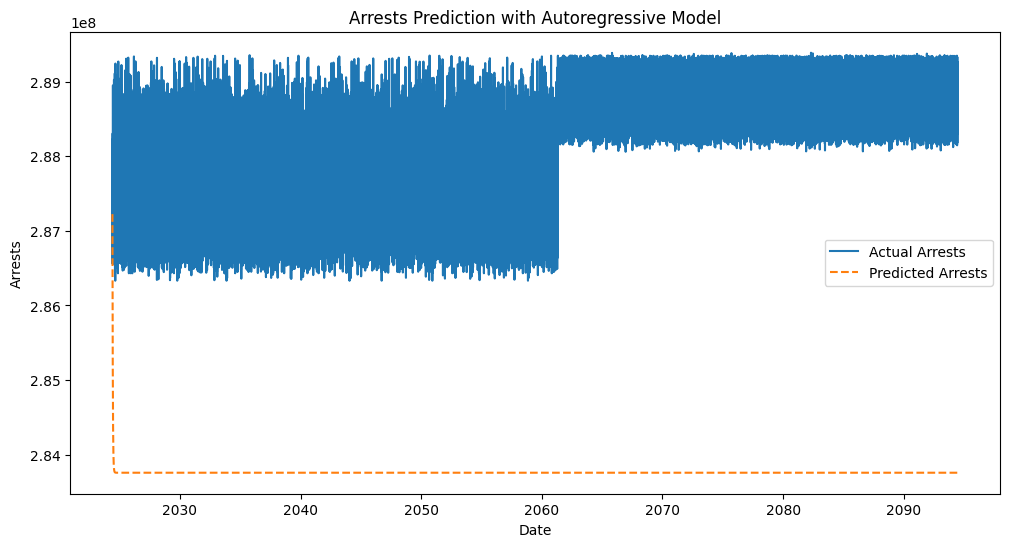

In [ ]:
train_data['ARREST_DATE'] = pd.to_datetime(train_data['ARREST_DATE'])

test_data['Date'] = pd.date_range(start=train_data['ARREST_DATE'].iloc[-1] + pd.Timedelta(days=1), periods=len(test_data), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(test_data["Date"], y_test, label='Actual Arrests')
plt.plot(test_data["Date"], y_pred, label='Predicted Arrests', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Arrests')
plt.legend()
plt.title('Arrests Prediction with Autoregressive Model')
plt.show()

Arima Model.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

date_rng = pd.date_range(start='01/03/2024', periods=200, freq='D')

arrest_by_month = pd.DataFrame(date_rng, columns=['ARREST_DATE'])
arrest_by_month['Count'] = np.random.randint(50, 200, size=(len(date_rng)))

arrest_by_month.set_index('ARREST_DATE', inplace=True)

result = adfuller(arrest_by_month['Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    arrest_by_month['Count_diff'] = arrest_by_month['Count'].diff()
    print('Data differenced to achieve stationarity.')
else:
    arrest_by_month['Count_diff'] = arrest_by_month['Count']
    print('Data is already stationary.')

# ARIMA model
arima_model = ARIMA(arrest_by_month['Count_diff'], order=(1, 0, 1))
arima_result = arima_model.fit()
print('ARIMA model fitted.')

# SARIMA model
sarima_model = SARIMAX(arrest_by_month['Count_diff'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print('SARIMA model fitted.')

# SARIMAX model
sarimax_model = SARIMAX(arrest_by_month['Count_diff'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12), exog=None)
sarimax_result = sarimax_model.fit()
print('SARIMAX model fitted.')

# Calculate MSE
arima_mse = mean_squared_error(arrest_by_month['Count_diff'], arima_result.fittedvalues)
sarima_mse = mean_squared_error(arrest_by_month['Count_diff'][12:], sarima_result.fittedvalues)
sarimax_mse = mean_squared_error(arrest_by_month['Count_diff'][12:], sarimax_result.fittedvalues)

print('ARIMA MSE:', arima_mse)
print('SARIMA MSE:', sarima_mse)
print('SARIMAX MSE:', sarimax_mse)

ADF Statistic: -4.685838100572467
p-value: 8.946163780385369e-05
Data is already stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA model fitted.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA model fitted.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMAX model fitted.


ValueError: Found input variables with inconsistent numbers of samples: [188, 200]

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

arrest_by_month.index = pd.to_datetime(arrest_by_month.index)
lags = 12

# ARIMA Forecast
arima_model = ARIMA(arrest_by_month['Count'], order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=lags)

# SARIMA Forecast
sarima_model = SARIMAX(arrest_by_month['Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=lags)

sarimax_model = SARIMAX(arrest_by_month['Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()
sarimax_forecast = sarimax_result.forecast(steps=lags)

forecast_index = pd.date_range(start=arrest_by_month.index[-1] + pd.DateOffset(months=1), periods=lags, freq='MS')
forecast_df = pd.DataFrame({
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast,
    'SARIMAX': sarimax_forecast
}, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(arrest_by_month.index, arrest_by_month['Count'], label='Past Data')
plt.plot(forecast_df.index, forecast_df['ARIMA'], label='ARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['SARIMA'], label='SARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['SARIMAX'], label='SARIMAX Forecast')
plt.title('Arrest Rate Forecasts')
plt.xlabel('Date')
plt.ylabel('Arrest Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(forecast_df)

average_forecast = forecast_df.mean().mean()
print(f"Average forecasted monthly crime rate: {average_forecast:.2f}")

NameError: name 'arrest_by_month' is not defined

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a922nra/zb9ch5d9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a922nra/p8aczwdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10986', 'data', 'file=/tmp/tmp_a922nra/zb9ch5d9.json', 'init=/tmp/tmp_a922nra/p8aczwdr.json', 'output', 'file=/tmp/tmp_a922nra/prophet_model1oh2rjvi/prophet_model-20241013085323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


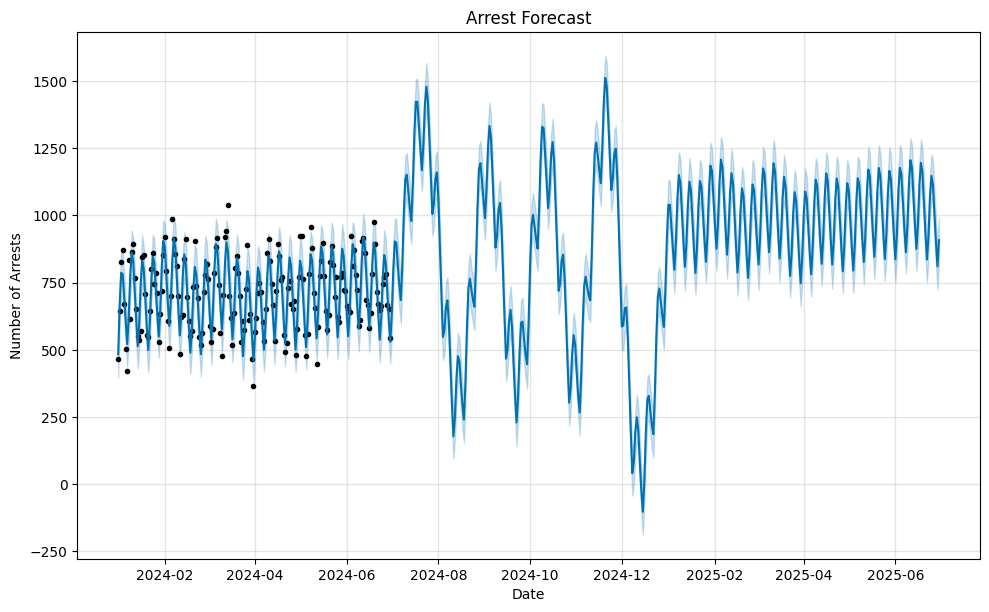

In [ ]:
from prophet import Prophet
important_columns=['ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
df_cleaned = df.dropna(subset=important_columns)

df_prophet = df_cleaned.groupby('ARREST_DATE').size().reset_index(name='y')
df_prophet = df_prophet.rename(columns={'ARREST_DATE': 'ds'})

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

future_dates = model.make_future_dataframe(periods=365)

forecast = model.predict(future_dates)

fig1 = model.plot(forecast)
plt.title('Arrest Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.show()

<Figure size 1200x1000 with 0 Axes>

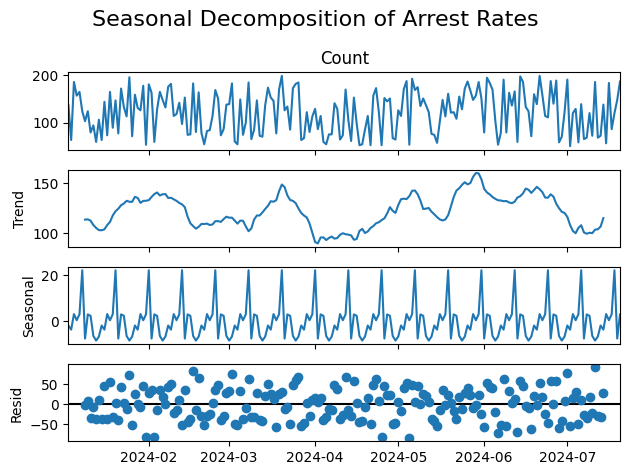

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(arrest_by_month['Count'], model='additive', period=12)

plt.figure(figsize=(12, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Arrest Rates', fontsize=16)
plt.tight_layout()
plt.show()

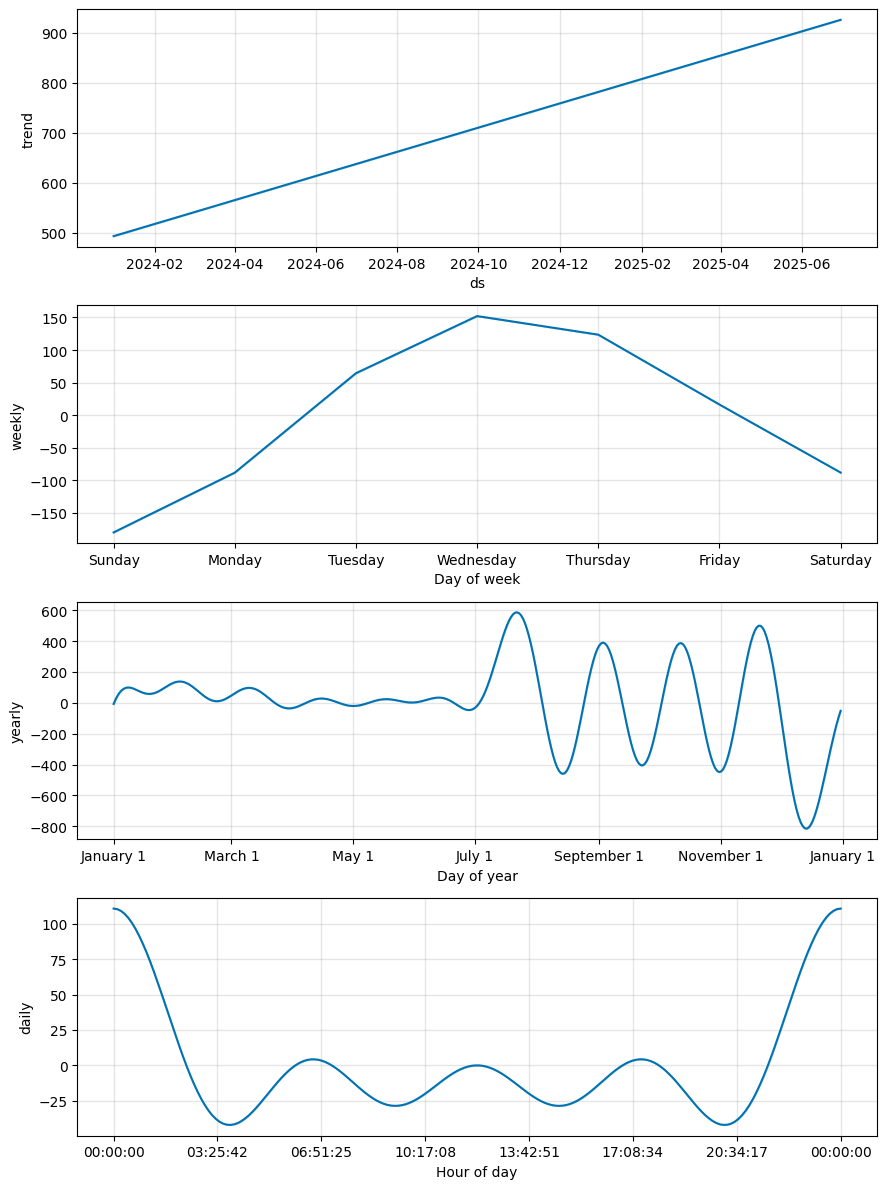

Forecast summary for the next 30 days:
            ds         yhat   yhat_lower   yhat_upper
517 2025-06-01   836.427107   754.178755   921.361333
518 2025-06-02   930.578551   845.130852  1008.825698
519 2025-06-03  1086.349805   999.871839  1172.523480
520 2025-06-04  1177.715345  1090.305152  1261.956633
521 2025-06-05  1153.201254  1073.129609  1244.453121
522 2025-06-06  1050.263845   960.934095  1131.805820
523 2025-06-07   950.294235   866.182860  1034.248598
524 2025-06-08   862.776559   785.261945   944.941717
525 2025-06-09   958.675721   874.619136  1044.480037
526 2025-06-10  1115.061304  1033.039011  1201.877594
527 2025-06-11  1205.792840  1126.609938  1287.383833
528 2025-06-12  1179.330751  1089.323427  1265.390867
529 2025-06-13  1073.120610   981.344003  1154.843474
530 2025-06-14   968.601584   887.320584  1056.378327
531 2025-06-15   875.366529   792.923404   961.435293
532 2025-06-16   964.549476   877.015251  1047.939477
533 2025-06-17  1113.447068  1032.210545  1

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

print("Forecast summary for the next 30 days:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

In [ ]:
trend_start = forecast['trend'].iloc[0]
trend_end = forecast['trend'].iloc[-1]
trend_change = ((trend_end - trend_start) / trend_start) * 100

print(f"\
Overall trend change: {trend_change:.2f}%")

Overall trend change: 87.78%


In [ ]:
yearly_seasonality = forecast['yearly'].max() - forecast['yearly'].min()
weekly_seasonality = forecast['weekly'].max() - forecast['weekly'].min()
daily_seasonality = forecast['daily'].max() - forecast['daily'].min()

print(f"\
Seasonality ranges:")
print(f"Yearly: {yearly_seasonality:.2f}")
print(f"Weekly: {weekly_seasonality:.2f}")
print(f"Daily: {daily_seasonality:.2f}")

Seasonality ranges:
Yearly: 1399.29
Weekly: 332.24
Daily: 0.00


Data shape: (182, 2)
Data types:
ds    object
y      int64
dtype: object
First few rows:
           ds    y
0  01/01/2024  466
1  01/02/2024  643
2  01/03/2024  826
3  01/04/2024  872
4  01/05/2024  670
Last few rows:
             ds    y
177  06/26/2024  771
178  06/27/2024  783
179  06/28/2024  666
180  06/29/2024  650
181  06/30/2024  545
Missing values:
ds    0
y     0
dtype: int64


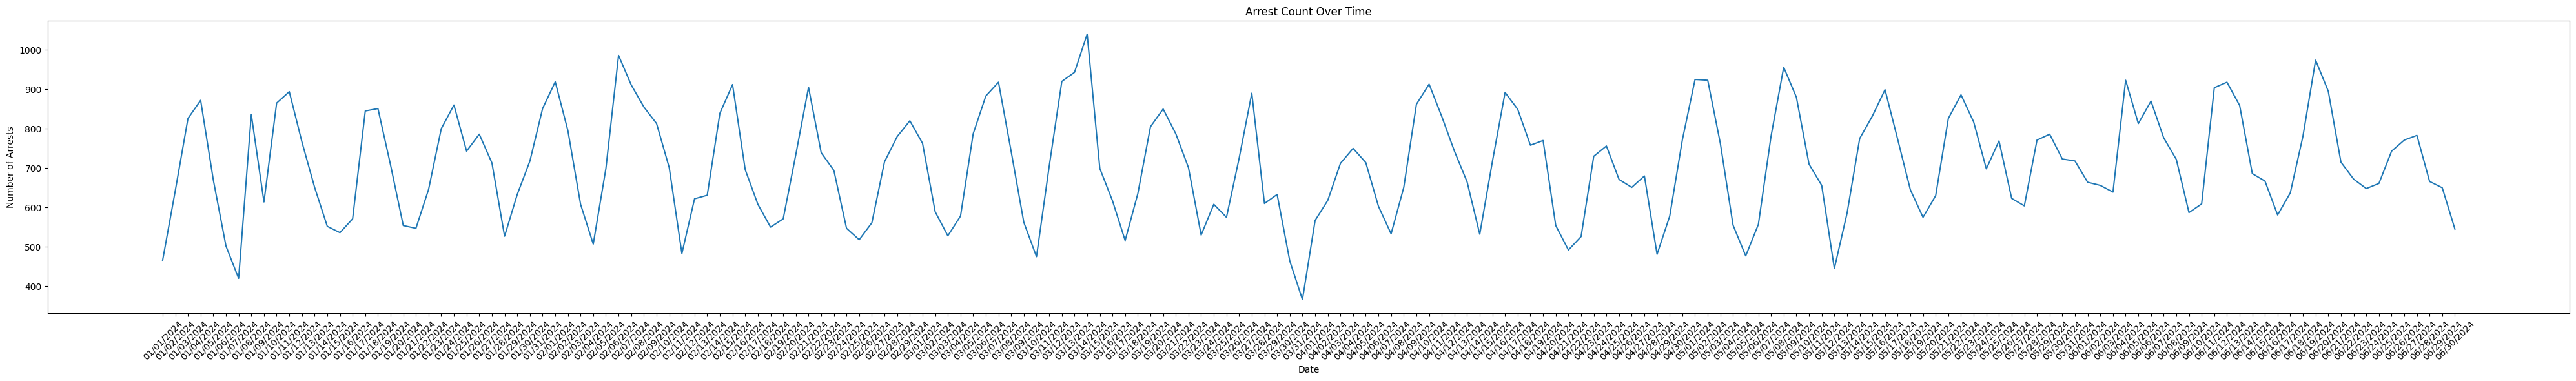

In [ ]:
df_prophet = df_cleaned.groupby('ARREST_DATE').size().reset_index(name='y')
df_prophet = df_prophet.rename(columns={'ARREST_DATE': 'ds'})

print("Data shape:", df_prophet.shape)
print("\
Data types:")
print(df_prophet.dtypes)
print("\
First few rows:")
print(df_prophet.head())
print("\
Last few rows:")
print(df_prophet.tail())

print("\
Missing values:")
print(df_prophet.isnull().sum())

plt.figure(figsize=(40,6))
plt.plot(df_prophet['ds'], df_prophet['y'])
plt.title('Arrest Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("\
Summary statistics:")
print(df_prophet['y'].describe())

Summary statistics:
count     182.000000
mean      707.571429
std       136.362625
min       366.000000
25%       608.000000
50%       708.500000
75%       813.000000
max      1040.000000
Name: y, dtype: float64


In [ ]:
print("\
Date range:")
print("Start date:", df_prophet['ds'].min())
print("End date:", df_prophet['ds'].max())

date_range = pd.date_range(start=df_prophet['ds'].min(), end=df_prophet['ds'].max())
missing_dates = date_range.difference(df_prophet['ds'])
print("\
Number of missing dates:", len(missing_dates))
if len(missing_dates) > 0:
    print("Sample of missing dates:")
    print(missing_dates[:5])

Date range:
Start date: 01/01/2024
End date: 06/30/2024
Number of missing dates: 182
Sample of missing dates:
DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
import pandas as pd

print("\nDate range:")
print("Start date:", df_prophet['ds'].min())
print("End date:", df_prophet['ds'].max())

date_range = pd.date_range(start=df_prophet['ds'].min(), end=df_prophet['ds'].max(), freq='D')

missing_dates = date_range.difference(df_prophet['ds'])

print("\nNumber of missing dates:", len(missing_dates))
if len(missing_dates) > 0:
    print("Sample of missing dates:")
    print(missing_dates[:5])

    df_complete = pd.DataFrame({'ds': date_range})

    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    df_prophet = pd.merge(df_complete, df_prophet, on='ds', how='left')

    df_prophet = df_prophet.ffill()

    df_prophet = df_prophet.bfill()

    print("\nAfter filling missing dates:")
    print("Number of rows:", len(df_prophet))
    print("Start date:", df_prophet['ds'].min())
    print("End date:", df_prophet['ds'].max())
else:
    print("No missing dates found.")

print("\nMissing values in each column:")
print(df_prophet.isnull().sum())


Date range:
Start date: 01/01/2024
End date: 06/30/2024

Number of missing dates: 182
Sample of missing dates:
DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')

After filling missing dates:
Number of rows: 182
Start date: 2024-01-01 00:00:00
End date: 2024-06-30 00:00:00

Missing values in each column:
ds    0
y     0
dtype: int64


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a922nra/_g0r_r58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a922nra/ecq7rl49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52954', 'data', 'file=/tmp/tmp_a922nra/_g0r_r58.json', 'init=/tmp/tmp_a922nra/ecq7rl49.json', 'output', 'file=/tmp/tmp_a922nra/prophet_modelg_d7c4xl/prophet_model-20241013091259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:12:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


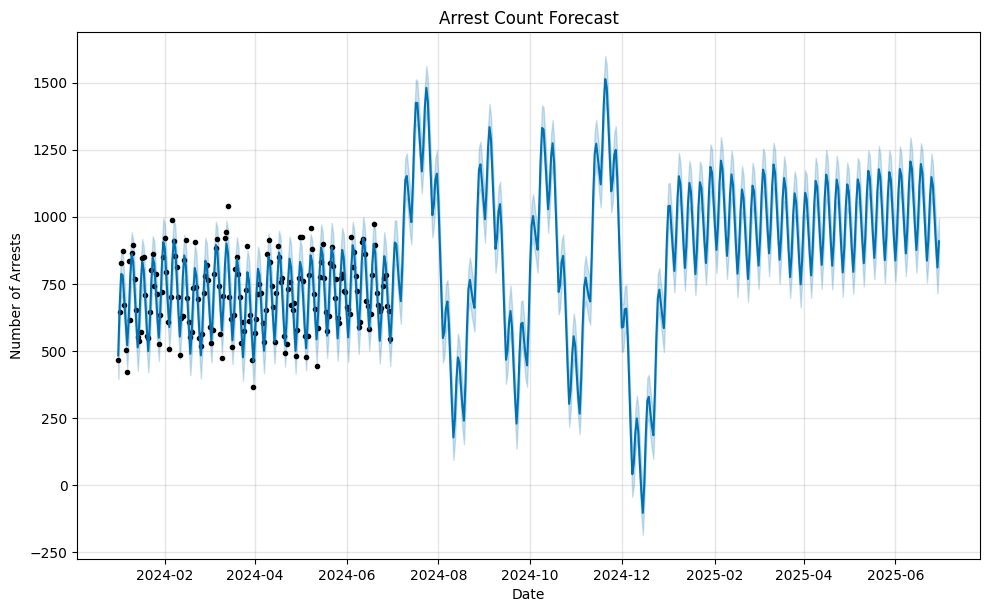

In [ ]:
from datetime import datetime
current_date = datetime.now().date()
df_prophet = df_prophet[df_prophet['ds'].dt.date <= current_date]

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Arrest Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.show()

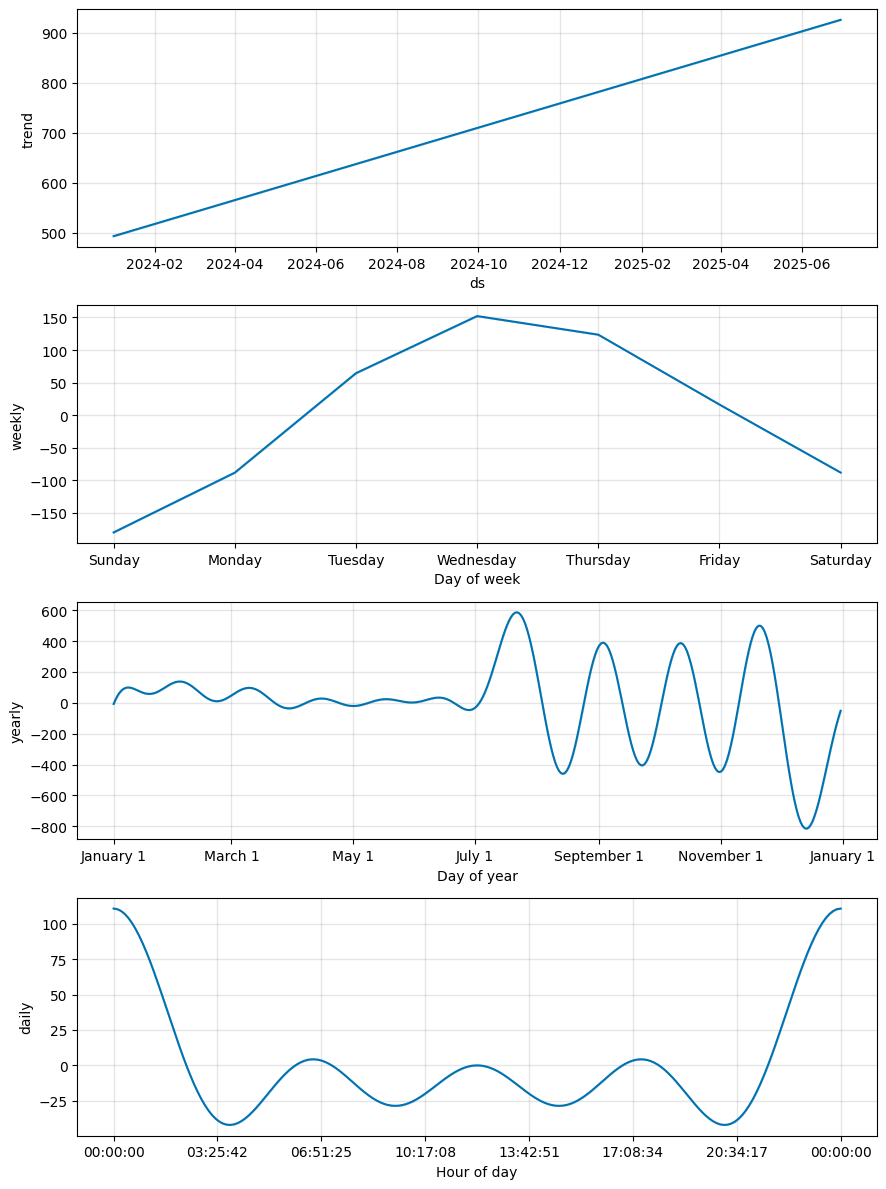

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
print("Forecast Summary:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast Summary:
            ds         yhat   yhat_lower   yhat_upper
542 2025-06-26  1114.543089  1033.750935  1196.537449
543 2025-06-27  1004.613843   921.372470  1090.650795
544 2025-06-28   899.911689   812.996690   983.862898
545 2025-06-29   810.551443   712.606313   899.549870
546 2025-06-30   908.100147   823.275690   994.466936


In [ ]:
import folium
from folium.plugins import HeatMap

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df.dropna(subset=['Latitude', 'Longitude'])

map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

map.save('arrest_heatmap.html')

In [ ]:
print("\
Number of crime arrests conducted:", len(df))

Number of crime arrests conducted: 128778


In [ ]:
print("\
Top 5 races arrested most frequently:")
print(df['PERP_RACE'].value_counts().head())

Top 5 races arrested most frequently:
PERP_RACE
BLACK                       59706
WHITE HISPANIC              34738
WHITE                       13187
BLACK HISPANIC              12837
ASIAN / PACIFIC ISLANDER     7367
Name: count, dtype: int64
